# ColBERTv2 with RAGatouille
* Notebook by Adam Lang
* Date: 7/25/2024

# Overview
* In this notebook we will go over some of the well known issues with **DENSE** embedding models and how using models like **ColBERT** with contexualized late interactions can improve embedding semantic search queries.

# What is the problem with DENSE Embeddings?

### Quick Review
* Each embedding model has different dimensions.
* One of the more popular open source embedding models is the BGE small with a dimension of 384.
* A newer and larger embedding model called `SFR-Embedding-Mistral` has a whopping dimension size of 4096!!

### The problem?
* Let's say the document(s) text chunks you are working with are a series of paragraphs rather than short sentences.
* A larger chunk size means:
    * Compressing more information into a smaller space (dimension).
    * Compression can lead to information loss.
    * You are representing a larger text chunk with higher magnitude with **1 single high-dimensional vector** which may not appropriately capture the semantic relationship with other chunks.
    * Relevance is modeled as a simple dot product between
both vectors.

### Solution? ColBERT
* `Col` = Contextualized Late Interaction
* Steps of how ColBERT works:

1. For Documents/Chunks and Query we tokenize the text.
2. Vector embeddings computed for each individual token (Document/Chunks and Query).
3. Similarity Score Computation
   * Compute similarity between each token in Query with each token in Document/Chunks.

4. Overall similarity score computed
   * ColBERT produces an embedding for every token in
the query (and document) and models relevance
as the sum of maximum similarities between each
query vector and all vectors in the document.

   * Original ColBERTv2 paper diagram:

   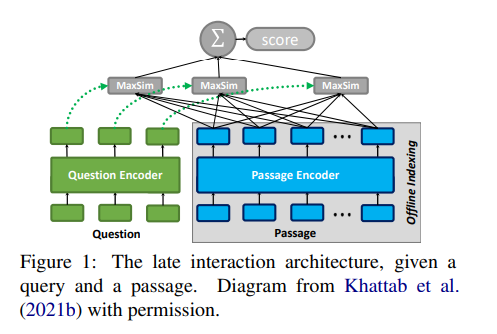

* Original paper: https://arxiv.org/pdf/2112.01488

## Technical Options
* Original repo: https://github.com/stanford-futuredata/ColBERT
* RAGatouille
   * Easily use and train state of the art late-interaction retrieval methods (ColBERT) in any RAG pipeline.
   * The package is built on top of ColBERT and designed for modularity and ease-of-use, backed by research.
   * Link: https://github.com/bclavie/RAGatouille

# Experiment with ColBERT

In [1]:
!pip install -q llama-hub
!pip install -q arxiv
!pip install -q semanticscholar
!pip install -l sentence-transformers==2.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.9/103.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 73.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.0/337.0 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00
  Preparing

In [2]:
!pip install -q ragatouille
!pip install -q llama-index-readers-file

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 9.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.9/302.9 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 104.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━

In [3]:
## download paper to experiment with
!wget https://arxiv.org/pdf/2306.02707.pdf

--2024-07-26 01:40:38--  https://arxiv.org/pdf/2306.02707.pdf
Resolving arxiv.org (arxiv.org)... 151.101.67.42, 151.101.3.42, 151.101.195.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.67.42|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://arxiv.org/pdf/2306.02707 [following]
--2024-07-26 01:40:38--  http://arxiv.org/pdf/2306.02707
Connecting to arxiv.org (arxiv.org)|151.101.67.42|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1458242 (1.4M) [application/pdf]
Saving to: ‘2306.02707.pdf’

2306.02707.pdf      100%[===================>]   1.39M  5.40MB/s    in 0.3s    

2024-07-26 01:40:39 (5.40 MB/s) - ‘2306.02707.pdf’ saved [1458242/1458242]



In [4]:
## load with lama_index PDFReader
from llama_index.readers.file import PDFReader

# setup PDFReader
loader = PDFReader()

# load documents
docs = loader.load_data('/content/2306.02707.pdf')

In [5]:
## view an idx of pdf file
docs[0]

Document(id_='8f20db56-69e8-4882-81ef-592d9e9520a8', embedding=None, metadata={'page_label': '1', 'file_name': '2306.02707.pdf'}, excluded_embed_metadata_keys=[], excluded_llm_metadata_keys=[], relationships={}, text='Orca: Progressive Learning from Complex\nExplanation Traces of GPT-4\nSubhabrata Mukherjee∗†, Arindam Mitra∗\nGanesh Jawahar, Sahaj Agarwal, Hamid Palangi, Ahmed Awadallah\nMicrosoft Research\nAbstract\nRecent research has focused on enhancing the capability of smaller models\nthrough imitation learning, drawing on the outputs generated by large\nfoundation models (LFMs). A number of issues impact the quality of these\nmodels, ranging from limited imitation signals from shallow LFM outputs;\nsmall scale homogeneous training data; and most notably a lack of rigorous\nevaluation resulting in overestimating the small model’s capability as they\ntend to learn to imitate the style, but not the reasoning process of LFMs . To\naddress these challenges, we develop Orca, a 13-bill

In [6]:
## extract original text from document objects
list_pdf_docs = [doc.text for doc in docs]

In [7]:
## view extracted docs
list_pdf_docs

['Orca: Progressive Learning from Complex\nExplanation Traces of GPT-4\nSubhabrata Mukherjee∗†, Arindam Mitra∗\nGanesh Jawahar, Sahaj Agarwal, Hamid Palangi, Ahmed Awadallah\nMicrosoft Research\nAbstract\nRecent research has focused on enhancing the capability of smaller models\nthrough imitation learning, drawing on the outputs generated by large\nfoundation models (LFMs). A number of issues impact the quality of these\nmodels, ranging from limited imitation signals from shallow LFM outputs;\nsmall scale homogeneous training data; and most notably a lack of rigorous\nevaluation resulting in overestimating the small model’s capability as they\ntend to learn to imitate the style, but not the reasoning process of LFMs . To\naddress these challenges, we develop Orca, a 13-billion parameter model\nthat learns to imitate the reasoning process of LFMs. Orca learns from\nrich signals from GPT-4 including explanation traces; step-by-step thought\nprocesses; and other complex instructions, guid

Summary:
* Now we have a list of the text docs.

## RAGatouille
* We will load the `ColBERTv2` model from the RAGatouille library.

In [8]:
# import ragatouille model
from ragatouille import RAGPretrainedModel

# instantiate model
RAG = RAGPretrainedModel.from_pretrained('colbert-ir/colbertv2.0')


artifact.metadata:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [9]:
## create RAG index
## similar to creating a Vector DB
RAG.index(
    collection=list_pdf_docs, # text documents
    index_name='orca', #custom name index
    max_document_length=256, #similar to chunk size
    split_documents=True #split based on max_doc_len
)

---- WARNING! You are using PLAID with an experimental replacement for FAISS for greater compatibility ----
This is a behaviour change from RAGatouille 0.8.0 onwards.
This works fine for most users and smallish datasets, but can be considerably slower than FAISS and could cause worse results in some situations.
If you're confident with FAISS working on your machine, pass use_faiss=True to revert to the FAISS-using behaviour.
--------------------


[Jul 26, 01:43:30] #> Creating directory .ragatouille/colbert/indexes/orca 


[Jul 26, 01:43:33] [0] 		 #> Encoding 219 passages..
[Jul 26, 01:43:35] [0] 		 avg_doclen_est = 155.7305908203125 	 len(local_sample) = 219
[Jul 26, 01:43:35] [0] 		 Creating 2,048 partitions.
[Jul 26, 01:43:35] [0] 		 *Estimated* 34,104 embeddings.
[Jul 26, 01:43:35] [0] 		 #> Saving the indexing plan to .ragatouille/colbert/indexes/orca/plan.json ..
used 20 iterations (0.4728s) to cluster 32400 items into 2048 clusters
[Jul 26, 01:43:35] Loading decompress_residua

/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


[Jul 26, 01:44:48] Loading packbits_cpp extension (set COLBERT_LOAD_TORCH_EXTENSION_VERBOSE=True for more info)...


/usr/local/lib/python3.10/dist-packages/torch/utils/cpp_extension.py:1967: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


[0.034, 0.038, 0.032, 0.031, 0.032, 0.034, 0.036, 0.033, 0.032, 0.035, 0.033, 0.034, 0.031, 0.035, 0.034, 0.035, 0.031, 0.034, 0.031, 0.034, 0.033, 0.035, 0.032, 0.035, 0.031, 0.033, 0.034, 0.034, 0.035, 0.036, 0.033, 0.035, 0.035, 0.033, 0.033, 0.031, 0.037, 0.033, 0.033, 0.037, 0.035, 0.035, 0.034, 0.034, 0.034, 0.032, 0.033, 0.037, 0.034, 0.035, 0.032, 0.034, 0.034, 0.034, 0.033, 0.035, 0.036, 0.034, 0.036, 0.032, 0.034, 0.036, 0.036, 0.035, 0.036, 0.036, 0.035, 0.035, 0.033, 0.034, 0.036, 0.032, 0.034, 0.035, 0.035, 0.035, 0.036, 0.035, 0.035, 0.037, 0.036, 0.035, 0.035, 0.037, 0.033, 0.034, 0.034, 0.034, 0.032, 0.038, 0.035, 0.035, 0.033, 0.035, 0.034, 0.032, 0.036, 0.032, 0.034, 0.034, 0.034, 0.036, 0.033, 0.033, 0.035, 0.031, 0.036, 0.031, 0.032, 0.032, 0.035, 0.037, 0.035, 0.031, 0.035, 0.033, 0.034, 0.033, 0.033, 0.037, 0.032, 0.033, 0.033, 0.034, 0.033, 0.035, 0.034, 0.031]


0it [00:00, ?it/s]

[Jul 26, 01:46:01] [0] 		 #> Encoding 219 passages..


1it [00:00,  2.00it/s]
100%|██████████| 1/1 [00:00<00:00, 308.52it/s]

[Jul 26, 01:46:02] #> Optimizing IVF to store map from centroids to list of pids..
[Jul 26, 01:46:02] #> Building the emb2pid mapping..
[Jul 26, 01:46:02] len(emb2pid) = 34105



100%|██████████| 2048/2048 [00:00<00:00, 56542.86it/s]

[Jul 26, 01:46:02] #> Saved optimized IVF to .ragatouille/colbert/indexes/orca/ivf.pid.pt
Done indexing!


'.ragatouille/colbert/indexes/orca'

In [10]:
## query documents
results= RAG.search(query="What is explanation tuning", k=3, index_name='orca')

Loading searcher for index orca for the first time... This may take a few seconds
[Jul 26, 01:46:07] #> Loading codec...
[Jul 26, 01:46:07] #> Loading IVF...
[Jul 26, 01:46:07] #> Loading doclens...


100%|██████████| 1/1 [00:00<00:00, 1757.14it/s]

[Jul 26, 01:46:07] #> Loading codes and residuals...



100%|██████████| 1/1 [00:00<00:00, 307.93it/s]

Searcher loaded!

#> QueryTokenizer.tensorize(batch_text[0], batch_background[0], bsize) ==
#> Input: . What is explanation tuning, 		 True, 		 None
#> Output IDs: torch.Size([32]), tensor([  101,     1,  2054,  2003,  7526, 17372,   102,   103,   103,   103,
          103,   103,   103,   103,   103,   103,   103,   103,   103,   103,
          103,   103,   103,   103,   103,   103,   103,   103,   103,   103,
          103,   103], device='cuda:0')
#> Output Mask: torch.Size([32]), tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')



In [11]:
## view k=3 results
results

[{'content': 'For example, we notice\nthat models that are instruction-tuned with GPT-4 responses tend to generate longer texts\nthat GPT-4 prefers over shorter ones; as well as GPT-4 has a bias in the order of the candidate\nresponses. We will show that such auto-evaluation measures overestimate the abilities of\nsmaller models compared to LFMs, as the former are much weaker in comprehension and\nreasoning skills.\n1.2 Key Contributions\nIn this research, our focus is on addressing the challenges mentioned above, specifically with:\nExplanation tuning: We augment⟨query, response⟩pairs with detailed responses from\nGPT-4 that explain the reasoning process of the teacher as it generates the response. These\nprovide the student with additional signals for learning. We leverage system instructions (e.g..,\nexplain like I’m five, think step-by-step and justify your response , etc.) to\nelicit such explanations. This is in contrast to vanilla instruction tuning, which only uses the\nprompt 

In [12]:
## formatted results
for i, doc in enumerate(results):
  print(f"----------------------------- doc-{i}-------------------------------------------------------")
  print(doc['content'])

----------------------------- doc-0-------------------------------------------------------
For example, we notice
that models that are instruction-tuned with GPT-4 responses tend to generate longer texts
that GPT-4 prefers over shorter ones; as well as GPT-4 has a bias in the order of the candidate
responses. We will show that such auto-evaluation measures overestimate the abilities of
smaller models compared to LFMs, as the former are much weaker in comprehension and
reasoning skills.
1.2 Key Contributions
In this research, our focus is on addressing the challenges mentioned above, specifically with:
Explanation tuning: We augment⟨query, response⟩pairs with detailed responses from
GPT-4 that explain the reasoning process of the teacher as it generates the response. These
provide the student with additional signals for learning. We leverage system instructions (e.g..,
explain like I’m five, think step-by-step and justify your response , etc.) to
elicit such explanations. This is in con

## Summary
* So far we have seen we can use RAGatouille and the ColBERTv2 embedding model to get ranked similarity results based on our query.
* Next we can compare this to other methods to see which result was better.

# LangChain Example for Comparison

In [28]:
!pip install langchain==0.2.0
!pip install langchain-openai==0.1.7
!pip install langchain-community==0.2.0
!pip install langchain-chroma

  Using cached langchain-0.2.0-py3-none-any.whl.metadata (13 kB)
Using cached langchain-0.2.0-py3-none-any.whl (973 kB)
  Attempting uninstall: langchain
    Found existing installation: langchain 0.2.11
    Uninstalling langchain-0.2.11:
      Successfully uninstalled langchain-0.2.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-community 0.2.10 requires langchain<0.3.0,>=0.2.9, but you have langchain 0.2.0 which is incompatible.
ragatouille 0.0.8.post2 requires langchain<0.2.0,>=0.1.0, but you have langchain 0.2.0 which is incompatible.
ragatouille 0.0.8.post2 requires langchain_core<0.2.0,>=0.1.4, but you have langchain-core 0.2.23 which is incompatible.
  Using cached langchain_openai-0.1.7-py3-none-any.whl.metadata (2.5 kB)
Using cached langchain_openai-0.1.7-py3-none-any.whl (34 kB)
  Attempting uninstall: langchain-openai
    Found existing 

In [26]:
!pip install PyPDF2

In [35]:
## imports
from PyPDF2 import PdfReader
from langchain.vectorstores import FAISS #vector library comparison
from langchain.embeddings.openai import OpenAIEmbeddings #openai embeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
import os

In [30]:
##setup openai connection
from getpass import getpass

OPENAI_KEY = getpass("Enter your openai key: ")

Enter your openai key: ··········


In [31]:
##openai env setup

os.environ['OPENAI_API_KEY'] = OPENAI_KEY

In [32]:
## import pdf again
pdf_reader = PdfReader('/content/2306.02707.pdf')

## Using OpenAI Embeddings - Example

In [36]:
## openai embeddings
embeddings = OpenAIEmbeddings(model='text-embedding-3-small')

In [37]:
## extract into single document
text = ""
for page in pdf_reader.pages:
  text += page.extract_text()

In [38]:
## split documents with text splitter
## GPT-4 tokenizer
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    model_name = "gpt-4",
    chunk_size=256, #similar chunk_size to ColBERT
    chunk_overlap=0,
)

# split text
texts = text_splitter.split_text(text)

In [39]:
# view text
texts

['Orca: Progressive Learning from Complex\nExplanation Traces of GPT-4\nSubhabrata Mukherjee∗†, Arindam Mitra∗\nGanesh Jawahar, Sahaj Agarwal, Hamid Palangi, Ahmed Awadallah\nMicrosoft Research\nAbstract\nRecent research has focused on enhancing the capability of smaller models\nthrough imitation learning, drawing on the outputs generated by large\nfoundation models (LFMs). A number of issues impact the quality of these\nmodels, ranging from limited imitation signals from shallow LFM outputs;\nsmall scale homogeneous training data; and most notably a lack of rigorous\nevaluation resulting in overestimating the small model’s capability as they\ntend to learn to imitate the style, but not the reasoning process of LFMs . To\naddress these challenges, we develop Orca, a 13-billion parameter model\nthat learns to imitate the reasoning process of LFMs. Orca learns from\nrich signals from GPT-4 including explanation traces; step-by-step thought\nprocesses; and other complex instructions, guid

In [40]:
## vector store - FAISS library
docsearch = FAISS.from_texts(texts, embeddings)

In [41]:
## semantic search - same query
similar_docs= docsearch.similarity_search("What is explanation tuning?")

In [42]:
## get query result
for i, doc in enumerate(similar_docs):
  print(f"---------------------------------- doc-{i}--------------------------------")
  print(doc.page_content)

---------------------------------- doc-0--------------------------------
Work in progress.arXiv:2306.02707v1  [cs.CL]  5 Jun 2023Contents
1 Introduction 4
1.1 Challenges with Existing Methods . . . . . . . . . . . . . . . . . . . . . . . . 5
1.2 Key Contributions . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 6
2 Preliminaries 7
2.1 Instruction Tuning . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 7
2.2 Role of System Instructions . . . . . . . . . . . . . . . . . . . . . . . . . . . . 7
3 Explanation Tuning 8
3.1 Dataset Construction . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 8
---------------------------------- doc-1--------------------------------
that GPT-4 prefers over shorter ones; as well as GPT-4 has a bias in the order of the candidate
responses. We will show that such auto-evaluation measures overestimate the abilities of
smaller models compared to LFMs, as the former are much weaker in comprehension and
reasoning ski

Summary
* The main difference here is that the search returned the full table of contents as the first document which it thinks is the most relevant document to the query. Compared to the ColBERT search above, we can see that the table of contents is NOT the most relevant chunk or document for this query.

## Using SentenceTransformers Open Source Embeddings - Example

In [46]:
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer
from langchain.embeddings import HuggingFaceEmbeddings

In [47]:
## setup sent transformer embedding model
EMBEDDING_MODEL = 'BAAI/bge-small-en-v1.5'

# setup huggingface text splitter
text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
    AutoTokenizer.from_pretrained(EMBEDDING_MODEL),
    chunk_size=256,
    chunk_overlap=0,
)

# split text
texts = text_splitter.split_text(text)

# embed text
# hf_embed = load_embedding_model(EMBEDDING_MODEL)
hf_embed = HuggingFaceEmbeddings(model_name=EMBEDDING_MODEL) # use HuggingFaceEmbeddings from langchain to load embedding model

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [48]:
## load embeddings into FAISS vector library/store
docsearch = FAISS.from_texts(texts, hf_embed)
similar_docs = docsearch.similarity_search("What is explanation tuning?")

# get results
for i, doc in enumerate(similar_docs):
  print(f"------------------------------------ doc-{i} ----------------------------------------------")
  print(doc.page_content)

------------------------------------ doc-0 ----------------------------------------------
2.1 Instruction Tuning . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 7
2.2 Role of System Instructions . . . . . . . . . . . . . . . . . . . . . . . . . . . . 7
3 Explanation Tuning 8
3.1 Dataset Construction . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 8
3.1.1 System Messages . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 9
3.1.2 Dataset Description and Sampling from the FLAN-v2 Collection . . . 9
3.1.3 ChatGPT as Teaching Assistant . . . . . . . . . . . . . . . . . . . . . 12
------------------------------------ doc-1 ----------------------------------------------
the system generates a response. Existing works like Alpaca [ 7], Vicuna [ 9] and variants
follow a similar template to train small models with ⟨{user instruction, input}, output ⟩.
2 Preliminaries
2.1 Instruction Tuning
Instruction tuning [ 22] is a technique that allows pre-trained 

## Summary
* The result using SentenceTransformers was somewhat similar to using the OpenAI Embddings with the top or most relevant document returned being the table of contents. Although the other docs returned were slightly different than what the OpenAI embeddings returned. Still, the result does not seem as relevant to the query as the ColBERT result.

# Experiment - Increasing Chunk Size
* We recall from above, that dense embeddings tend to lose more information with higher dimensionality as there is more compression.
* Let's see how this compares with ColBERT vs. the 2 other models if we increase the chunk size from 256 to 512.

In [49]:
## Experiment 1 - ColBERTv2
RAG.index(
    collection=list_pdf_docs,
    index_name='orca',
    max_document_length=512, #increase from 256
    split_documents=True,
)

# query documents
results = RAG.search(query="What is a system message? List all system messages in the research paper.", k=4, index_name='orca')

# format output
for i, doc in enumerate(results):
  print(f"---------------------------------------------------- doc-{i} ---------------------------------------")
  print(doc['content'])

New index_name received! Updating current index_name (orca) to orca
---- WARNING! You are using PLAID with an experimental replacement for FAISS for greater compatibility ----
This is a behaviour change from RAGatouille 0.8.0 onwards.
This works fine for most users and smallish datasets, but can be considerably slower than FAISS and could cause worse results in some situations.
If you're confident with FAISS working on your machine, pass use_faiss=True to revert to the FAISS-using behaviour.
--------------------


[Jul 26, 02:40:33] #> Note: Output directory .ragatouille/colbert/indexes/orca already exists


[Jul 26, 02:40:33] #> Will delete 10 files already at .ragatouille/colbert/indexes/orca in 20 seconds...
[Jul 26, 02:40:56] [0] 		 #> Encoding 102 passages..
[Jul 26, 02:40:56] [0] 		 avg_doclen_est = 294.186279296875 	 len(local_sample) = 102
[Jul 26, 02:40:56] [0] 		 Creating 2,048 partitions.
[Jul 26, 02:40:56] [0] 		 *Estimated* 30,007 embeddings.
[Jul 26, 02:40:56] [0] 		 #> S

0it [00:00, ?it/s]

[Jul 26, 02:40:57] [0] 		 #> Encoding 102 passages..


1it [00:00,  2.09it/s]
100%|██████████| 1/1 [00:00<00:00, 884.31it/s]

[Jul 26, 02:40:57] #> Optimizing IVF to store map from centroids to list of pids..
[Jul 26, 02:40:57] #> Building the emb2pid mapping..
[Jul 26, 02:40:57] len(emb2pid) = 30007



100%|██████████| 2048/2048 [00:00<00:00, 59389.61it/s]

[Jul 26, 02:40:57] #> Saved optimized IVF to .ragatouille/colbert/indexes/orca/ivf.pid.pt


Done indexing!
Loading searcher for index orca for the first time... This may take a few seconds
[Jul 26, 02:41:00] #> Loading codec...
[Jul 26, 02:41:00] #> Loading IVF...
[Jul 26, 02:41:00] #> Loading doclens...


100%|██████████| 1/1 [00:00<00:00, 1152.28it/s]

[Jul 26, 02:41:00] #> Loading codes and residuals...



100%|██████████| 1/1 [00:00<00:00, 367.53it/s]

Searcher loaded!

#> QueryTokenizer.tensorize(batch_text[0], batch_background[0], bsize) ==
#> Input: . What is a system message? List all system messages in the research paper., 		 True, 		 None
#> Output IDs: torch.Size([32]), tensor([ 101,    1, 2054, 2003, 1037, 2291, 4471, 1029, 2862, 2035, 2291, 7696,
        1999, 1996, 2470, 3259, 1012,  102,  103,  103,  103,  103,  103,  103,
         103,  103,  103,  103,  103,  103,  103,  103], device='cuda:0')
#> Output Mask: torch.Size([32]), tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')

---------------------------------------------------- doc-0 ---------------------------------------
They are written in natural language and
separated from the user messages by using the role of “system” in the JSON request. System
instructions can specify the tone, task, format, and limitations of the model’s responses.
System instructions are also a way of improving th

In [52]:
## print raw results
results

[{'content': 'They are written in natural language and\nseparated from the user messages by using the role of “system” in the JSON request. System\ninstructions can specify the tone, task, format, and limitations of the model’s responses.\nSystem instructions are also a way of improving the safety of model responses. For example,\na set of system instructions designed for safety harness could be:\n•The assistant must not generate harmful or offensive content.\n•The assistant must respect the privacy and consent of the user.\n•The assistant must acknowledge its limitations and uncertainties.\n3 Explanation Tuning\nTo address the shortcomings of existing works, we tap into large-scale training data with\ndiverse tasks augmented with complex instructions and rich signals. Specifically, our data\ncontains human and augmented system instructions for a large collection of tasks sampled\nfrom FLAN-v2 (aka Flan 2022) [ 19]. Given the large size of the FLAN-v2 collection and\nvarying number of 

## Summary:
* The first 2 chunks retrieved were highly relevant to the query.
* We can also see the similarity score and rank for each document.

In [51]:
## Experiment 2 - openai embedding model
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    model_name="gpt-4",
    chunk_size=512, #increased from 256
    chunk_overlap=0,
)

# split text
texts = text_splitter.split_text(text)

# Create FAISS vector store
docsearch = FAISS.from_texts(texts, embeddings)

# Query
similar_docs = docsearch.similarity_search("What is a system message? List all the system messages in the research paper.")

# format results
for i, doc in enumerate(similar_docs):
  print(f"------------------------------------------------ doc-{i} -----------------------------------------")
  print(doc.page_content)

------------------------------------------------ doc-0 -----------------------------------------
sample 1million instructions from the 5million set for which we collect GPT-4 responses.
All the queries to the agents are augmented with system instructions, as outlined below.
83.1.1 System Messages
We hand-craft a total of 16system messages designed to evoke different kinds of responses
from the LFM. This allows us to train Orca to generate long and short answers; follow
guidelines, instructions, and format; generate creative content as well as address information-
seeking queries; and most importantly, generate explanations and step-by-step reasoning for
the responses, as prompted.
Id. System Message
1 <empty system message>
2You are an AI assistant. Provide a detailed answer so user don’t need to search outside to
understand the answer.
3You are an AI assistant. You will be given a task. You must generate a detailed and long
answer.
4You are a helpful assistant, who always provide expl

## Summary:
* The result was not as fine-tuned as the ColBERT result with increasing the embedding dimensions.

In [53]:
## Experiment 3 - SentenceTransformers open source model
## setup sent transformer embedding model
EMBEDDING_MODEL = 'BAAI/bge-small-en-v1.5'

# setup huggingface text splitter
text_splitter = RecursiveCharacterTextSplitter.from_huggingface_tokenizer(
    AutoTokenizer.from_pretrained(EMBEDDING_MODEL),
    chunk_size=512, #increased from 256
    chunk_overlap=0,
)

# split text
texts = text_splitter.split_text(text)

# embed text
# hf_embed = load_embedding_model(EMBEDDING_MODEL)
hf_embed = HuggingFaceEmbeddings(model_name=EMBEDDING_MODEL) # use HuggingFaceEmbeddings from langchain to load embedding model


## Create Vector Store
docsearch = FAISS.from_texts(texts, hf_embed)

# Create Query
similar_docs = docsearch.similarity_search("What is a system message? List all the system messages in the research paper.")

# format results
for i, doc in enumerate(similar_docs):
  print(f"---------------------------------------- doc-{i} -----------------------------------")
  print(doc.page_content)

---------------------------------------- doc-0 -----------------------------------
91 2 3 4 5 6 7 8 910 11 12 13 14 15 160.000.050.100.150.200.250.300.35frequencysub-collection = COT
1 2 3 4 5 6 7 8 910 11 12 13 14 15 16sub-collection = NiV2
1 2 3 4 5 6 7 8 910 11 12 13 14 15 16
system message id0.000.050.100.150.200.250.300.35frequencysub-collection = T0
1 2 3 4 5 6 7 8 910 11 12 13 14 15 16
system message idsub-collection = Flan2021Figure 6: Relative frequency of system messages in different collections of our training data.
of queries. Each sub-collection is associated with multiple academic datasets. One or more
tasks are created from each dataset, focusing on zero shot and few-shot queries. In this
work, we sample only zero-shot queries for training Orca. We have not sampled from the Di-
alogue sub-collection as the queries often lack context to elicit useful response from ChatGPT.
Mixture Name Sampling Algorithm Original Size Sampled
CoT No Sampling 150K 150K
NIV2 Stratified Samp

## Summary
* Yikes! This result was even worse with the higher dimensions.
* We can see that ColBERT does have a high potential to give better results.


## A few things
* An embedding model with higher dimensions is not "bad", in fact it can give you better results as it can fit more context into its dimensions.
* The OpenAI embedding models do have higher dimensions so their contextual retrieval quality somewhat similar to ColBERT. While the SentenceTransformer models did not perform as well as ColBERT and OpenAI here (granted we did not use metrics to compare), this may also shed some light on why fine tuning sentence transformer models on your data may give a better result as well (an experiment to try).
* We also have to consider the tokenization techniques used in each of the 3 techniques we discussed can peform differently on your data and use case.